In [188]:
#imports
#numpy, pandas, scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model


#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.model_selection import cross_val_score


#cross metrics
#from sklearn.cross_validation import train_test_split   -- Daba error --
from sklearn.model_selection import train_test_split


#Classsification Models
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


### - Carga de la Base

In [2]:
#data
rawData = pd.read_csv("C:/Data Analytics y Big Data/Modulo 2/Tareas/Tarea 3/default of credit card clients.csv", header=0, sep=';', index_col=0)
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,age_bins
0,1,3913,female,university,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,default,"(21.0, 27.0]"
1,2,2682,female,university,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,default,"(21.0, 27.0]"
2,3,29239,female,university,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,not default,"(31.0, 37.0]"
3,4,46990,female,university,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,not default,"(31.0, 37.0]"
4,5,8617,male,university,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,not default,"(43.0, 80.0]"


#### - Verificación de Tipos de Datos

In [3]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30201 entries, 0 to 30202
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30201 non-null  int64 
 1   LIMIT_BAL                   30201 non-null  int64 
 2   SEX                         30201 non-null  object
 3   EDUCATION                   30201 non-null  object
 4   MARRIAGE                    30201 non-null  int64 
 5   AGE                         30201 non-null  int64 
 6   PAY_0                       30201 non-null  int64 
 7   PAY_2                       30201 non-null  int64 
 8   PAY_3                       30201 non-null  int64 
 9   PAY_4                       30201 non-null  int64 
 10  PAY_5                       30201 non-null  int64 
 11  PAY_6                       30201 non-null  int64 
 12  BILL_AMT1                   30201 non-null  int64 
 13  BILL_AMT2                   30201 non-null  in

#### - Cambio de Tipos de Datos

In [4]:
rawData=rawData.astype({"ID":"category","SEX":"category","EDUCATION":"category","MARRIAGE":"category","PAY_0":"category","PAY_2":"category","PAY_3":"category","PAY_4":"category","PAY_5":"category","PAY_6":"category","default payment next month":"category", "age_bins":"category"})
rawData.dtypes

ID                            category
LIMIT_BAL                        int64
SEX                           category
EDUCATION                     category
MARRIAGE                      category
AGE                              int64
PAY_0                         category
PAY_2                         category
PAY_3                         category
PAY_4                         category
PAY_5                         category
PAY_6                         category
BILL_AMT1                        int64
BILL_AMT2                        int64
BILL_AMT3                        int64
BILL_AMT4                        int64
BILL_AMT5                        int64
BILL_AMT6                        int64
PAY_AMT1                         int64
PAY_AMT2                         int64
PAY_AMT3                         int64
PAY_AMT4                         int64
PAY_AMT5                         int64
PAY_AMT6                         int64
default payment next month    category
age_bins                 

### - Carga de la Base Dummie

In [5]:
#data_dummies
rawData_d = pd.read_csv("C:/Data Analytics y Big Data/Modulo 2/Tareas/Tarea 3/default of credit card clients_dummies.csv", header=0, sep=';', index_col=0)
rawData_d.head()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,...,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,default payment next month_default,default payment next month_not default
0,1,3913,24,3913,3102,689,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,2682,26,2682,1725,2682,3272,3455,3261,0,...,0,1,0,0,0,0,0,0,1,0
2,3,29239,34,29239,14027,13559,14331,14948,15549,1518,...,1,0,0,0,0,0,0,0,0,1
3,4,46990,37,46990,48233,49291,28314,28959,29547,2000,...,1,0,0,0,0,0,0,0,0,1
4,5,8617,57,8617,5670,35835,20940,19146,19131,2000,...,1,0,0,0,0,0,0,0,0,1


#### - Verificación de Tipos de Datos

In [6]:
rawData_d.dtypes

ID                                        int64
LIMIT_BAL                                 int64
AGE                                       int64
BILL_AMT1                                 int64
BILL_AMT2                                 int64
                                          ...  
PAY_6_6                                   int64
PAY_6_7                                   int64
PAY_6_8                                   int64
default payment next month_default        int64
default payment next month_not default    int64
Length: 91, dtype: object

In [8]:
rawData_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30201 entries, 0 to 30202
Data columns (total 91 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   ID                                      30201 non-null  int64
 1   LIMIT_BAL                               30201 non-null  int64
 2   AGE                                     30201 non-null  int64
 3   BILL_AMT1                               30201 non-null  int64
 4   BILL_AMT2                               30201 non-null  int64
 5   BILL_AMT3                               30201 non-null  int64
 6   BILL_AMT4                               30201 non-null  int64
 7   BILL_AMT5                               30201 non-null  int64
 8   BILL_AMT6                               30201 non-null  int64
 9   PAY_AMT1                                30201 non-null  int64
 10  PAY_AMT2                                30201 non-null  int64
 11  PAY_AMT3       

In [9]:
#features
X = rawData_d.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18,20,22,23,24,25,26,27,28,29,30,31,32,33,34,36,37,38,39,40,41,42,43,44,45,47,48,49,50,51,52,53,54,55,56,58,59,60,61,62,63,64,65,66,67,69,70,71,72,73,74,75,76,77,79,80,81,82,83,84,85,86,87
]]
print('Summary of feature sample')
X.head()

Summary of feature sample


,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
0,3913,24,3913,3102,689,0,0,0,0,689,...,0,1,0,0,0,0,0,0,0,0
1,2682,26,2682,1725,2682,3272,3455,3261,0,1000,...,0,0,0,0,1,0,0,0,0,0
2,29239,34,29239,14027,13559,14331,14948,15549,1518,1500,...,0,0,0,1,0,0,0,0,0,0
3,46990,37,46990,48233,49291,28314,28959,29547,2000,2019,...,0,0,0,1,0,0,0,0,0,0
4,8617,57,8617,5670,35835,20940,19146,19131,2000,36681,...,0,0,0,1,0,0,0,0,0,0


In [10]:
#dependent variable
y = rawData_d['default payment next month_default']
y.head()

0    1
1    1
2    0
3    0
4    0
Name: default payment next month_default, dtype: int64

In [12]:
#dependent variable
print(y)

0        1
1        1
2        0
3        0
4        0
        ..
30198    0
30199    0
30200    1
30201    1
30202    1
Name: default payment next month_default, Length: 30201, dtype: int64


In [11]:
model = LinearRegression(n_jobs=10)

In [13]:
print(cross_val_score(model, X, y, cv=3)) 

[0.16365581 0.21215516 0.21157561]


### - Modeling Format

In [14]:
algosClass = []
algosClass.append(('Random Forest Regressor',RandomForestRegressor()))
algosClass.append(('Linear Regression',LinearRegression()))
algosClass.append(('Support Vector Regression',SVR()))

In [15]:
#regression
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, X,y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)

In [16]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor 0.16637817402801483
Linear Regression 0.1957955300317967
Support Vector Regression -0.08553238422448883


    - Si nos vasamos en el coeficiente de determinación o R2, de acuerdo con los datos que tenemos actualmente el modelo de Regresión Lineal es el que nos presenta mayor ajuste para la variable que queremos predecir por tener un R2 más cercado a 1.

In [54]:
algo = LinearRegression()
algo_r = RandomForestRegressor()
algo_v = SVR()

In [46]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [55]:
model = algo.fit(X_train,y_train)
model_r = algo_r.fit(X_train,y_train)
model_v = algo_v.fit(X_train,y_train)

In [56]:
predictions = model.predict(X_test)
predictions_r = model_r.predict(X_test)
predictions_v = model_v.predict(X_test)

In [57]:
rmse = sqrt(mean_squared_error(y_test, predictions))
rmse_r = sqrt(mean_squared_error(y_test, predictions_r))
rmse_v = sqrt(mean_squared_error(y_test, predictions_v))

In [58]:
predRsquared = r2_score(y_test,predictions)
predRsquared_r = r2_score(y_test,predictions_r)
predRsquared_v = r2_score(y_test,predictions_v)

In [64]:
#Make Predictions_Linear
predictions = model.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
#print('R Squared: %.3f' % predRsquared)
#print('RMSE: %.3f' % rmse)

#Make Predictions_Random
predictions_r = model_r.predict(X_test)
predRsquared_r = r2_score(y_test,predictions_r)
rmse_r = sqrt(mean_squared_error(y_test, predictions_r))
#print('R Squared_r: %.3f' % predRsquared_r)
#print('RMSE_r: %.3f' % rmse_r)


#Make Predictions_SVR
predictions_v = model_v.predict(X_test)
predRsquared_v = r2_score(y_test,predictions_v)
rmse_v = sqrt(mean_squared_error(y_test, predictions_v))
#print('R Squared_v: %.3f' % predRsquared_v)
#print('RMSE_v: %.3f' % rmse_v)

print('- LinearRegression')
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)
print('')
print('- RandomForestRegressor')
print('R Squared_r: %.3f' % predRsquared_r)
print('RMSE_r: %.3f' % rmse_r)
print('')
print('- SVR')
print('R Squared_v: %.3f' % predRsquared_v)
print('RMSE_v: %.3f' % rmse_v)

- LinearRegression
R Squared: 0.188
RMSE: 0.375

- RandomForestRegressor
R Squared_r: 0.164
RMSE_r: 0.380

- SVR
R Squared_v: -0.087
RMSE_v: 0.433


 - De acuerdo con la interpretación de los resultados de R2 y RMSE para los 3 modelos realizados,  vemos que R2 para la Regresión Lineal sigue siendo el más cercado a uno de los tres modelos y su RMSE es el más bajo de los tres por lo que podemos decir que es el que tiene mejor ajuste. Hay que tener presente que estas consideraciones se establecieron de acuerdo con los resultados obtenidos al ejecutar los 3 modelos, no en base a si es o no un buen resultado para nuestro requerimiento.

## - Modelos de Clasificación (Base sin Dummies)

#### - Modelos a Utilizar

    - DecisionTreeClassifier
    - RandomForestClassifier
    - GradientBoostingClassifier
    - Naive_bayes GaussianNB
    - SVC

#### - Verificación de NAs

In [108]:
print("Total NaN en cada columna en el DataFrame : \n\n",
      rawData.isnull().sum())

Total NaN en cada columna en el DataFrame : 

 ID                             0
LIMIT_BAL                      0
SEX                            0
EDUCATION                      0
MARRIAGE                       0
AGE                            0
PAY_0                          0
PAY_2                          0
PAY_3                          0
PAY_4                          0
PAY_5                          0
PAY_6                          0
BILL_AMT1                      0
BILL_AMT2                      0
BILL_AMT3                      0
BILL_AMT4                      0
BILL_AMT5                      0
BILL_AMT6                      0
PAY_AMT1                       0
PAY_AMT2                       0
PAY_AMT3                       0
PAY_AMT4                       0
PAY_AMT5                       0
PAY_AMT6                       0
default payment next month     0
age_bins                      67
dtype: int64


#### - Eliminación de NAs

In [109]:
rawData = rawData.dropna()
print("Total NaN en cada columna en el DataFrame : \n\n",
      rawData.isnull().sum())

Total NaN en cada columna en el DataFrame : 

 ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
age_bins                      0
dtype: int64


In [117]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30134 entries, 0 to 30202
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   ID                          30134 non-null  category
 1   LIMIT_BAL                   30134 non-null  int64   
 2   SEX                         30134 non-null  category
 3   EDUCATION                   30134 non-null  category
 4   MARRIAGE                    30134 non-null  category
 5   AGE                         30134 non-null  int64   
 6   PAY_0                       30134 non-null  category
 7   PAY_2                       30134 non-null  category
 8   PAY_3                       30134 non-null  category
 9   PAY_4                       30134 non-null  category
 10  PAY_5                       30134 non-null  category
 11  PAY_6                       30134 non-null  category
 12  BILL_AMT1                   30134 non-null  int64   
 13  BILL_AMT2       

#### - Cambio de Tipos de Variables

In [133]:
rawData[['SEX']] = rawData[['SEX']].astype(str)
rawData[['EDUCATION']] = rawData[['EDUCATION']].astype(str)
rawData[['MARRIAGE']] = rawData[['MARRIAGE']].astype(str)
rawData[['default payment next month']] = rawData[['default payment next month']].astype(str)
rawData[['age_bins']] = rawData[['age_bins']].astype(str)

rawData[['PAY_0']] = rawData[['PAY_0']].astype(str)
rawData[['PAY_2']] = rawData[['PAY_2']].astype(str)
rawData[['PAY_3']] = rawData[['PAY_3']].astype(str)
rawData[['PAY_4']] = rawData[['PAY_4']].astype(str)
rawData[['PAY_5']] = rawData[['PAY_5']].astype(str)
rawData[['PAY_6']] = rawData[['PAY_6']].astype(str)

rawData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30134 entries, 0 to 30202
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   ID                          30134 non-null  category
 1   LIMIT_BAL                   30134 non-null  int64   
 2   SEX                         30134 non-null  object  
 3   EDUCATION                   30134 non-null  object  
 4   MARRIAGE                    30134 non-null  object  
 5   AGE                         30134 non-null  int64   
 6   PAY_0                       30134 non-null  object  
 7   PAY_2                       30134 non-null  object  
 8   PAY_3                       30134 non-null  object  
 9   PAY_4                       30134 non-null  object  
 10  PAY_5                       30134 non-null  object  
 11  PAY_6                       30134 non-null  object  
 12  BILL_AMT1                   30134 non-null  int64   
 13  BILL_AMT2       

In [148]:
rawData.loc[rawData['SEX'] == 'male', 'SEX'] = '1'
rawData.loc[rawData['SEX'] == 'female', 'SEX'] = '2'

rawData.loc[rawData['EDUCATION'] == 'graduate school', 'EDUCATION'] = '1'
rawData.loc[rawData['EDUCATION'] == 'university', 'EDUCATION'] = '2'
rawData.loc[rawData['EDUCATION'] == 'high school', 'EDUCATION'] = '3'
rawData.loc[rawData['EDUCATION'] == 'other', 'EDUCATION'] = '4'

rawData.loc[rawData['MARRIAGE'] == 'married', 'MARRIAGE'] = '1'
rawData.loc[rawData['MARRIAGE'] == 'single', 'MARRIAGE'] = '2'
rawData.loc[rawData['MARRIAGE'] == 'divorce', 'MARRIAGE'] = '3'
rawData.loc[rawData['MARRIAGE'] == 'others', 'MARRIAGE'] = '0'

rawData.loc[rawData['default payment next month'] == 'not default', 'default payment next month'] = '0'
rawData.loc[rawData['default payment next month'] == 'default', 'default payment next month'] = '1'

rawData.loc[rawData['age_bins'] == '(21.0, 27.0]', 'age_bins'] = '1'
rawData.loc[rawData['age_bins'] == '(27.0, 31.0]', 'age_bins'] = '2'
rawData.loc[rawData['age_bins'] == '(31.0, 37.0]', 'age_bins'] = '3'
rawData.loc[rawData['age_bins'] == '(37.0, 43.0]', 'age_bins'] = '4'
rawData.loc[rawData['age_bins'] == '(43.0, 80.0]', 'age_bins'] = '5'

rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,age_bins
0,1,3913,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,1
1,2,2682,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,1
2,3,29239,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,3
3,4,46990,2,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,3
4,5,8617,1,2,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,0,5


In [149]:
model2 = DecisionTreeClassifier()

In [150]:
#features
X2 = rawData.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]]
print('Summary of feature sample')
X2.head()

Summary of feature sample


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,3913,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,2682,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,29239,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,46990,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,8617,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [151]:
#dependent variable
y2 = rawData['default payment next month']
y2.head()

0    1
1    1
2    0
3    0
4    0
Name: default payment next month, dtype: object

#### - División Train/Test

In [154]:
#Train/Test Split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = .30, random_state = 123)

#### - Aplicación de Modelo (Train)

In [215]:
#Modeling (Classification)
clf = DecisionTreeClassifier()
model = clf.fit(X2_train,y2_train)

#### - Aplicacián de Modelo (Test)

In [216]:
#Predictions
preds = model.predict(X2_test)

#### - Informe

In [217]:
print(classification_report(y2_test, preds))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      7086
           1       0.39      0.42      0.40      1955

    accuracy                           0.73      9041
   macro avg       0.61      0.62      0.61      9041
weighted avg       0.74      0.73      0.73      9041



In [218]:
score = clf.score(X2_test, y2_test)
print(score)

0.7311138148434908


In [219]:
print(confusion_matrix(y2_test, preds))

[[5792 1294]
 [1137  818]]


    - Luego de aplicar el modelo Arboles de Desición se obtuvo como resultado general a nivel de presición un 73%, se podria decir que no esta mal para la corrida incial, calibraremos el hiperparametro max_depth para ver que resultado obtenemos.

#### - Ajuste de Hiperparametro max_depth

In [159]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 20))
accuracy = []
for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(X2_train, y2_train)    
    score = clf.score(X2_test, y2_test)
    accuracy.append(score)

    - Resultado

In [160]:
accuracy

[0.8189359584116801,
 0.8190465656453932,
 0.8210374958522287,
 0.8215905320207941,
 0.8172768499059838,
 0.8184935294768277,
 0.8167238137374184,
 0.8139586328945914,
 0.8116358809866165,
 0.8065479482358147,
 0.8035615529255613,
 0.8000221214467426,
 0.7982524057073332,
 0.7948235814622276,
 0.7873022895697379,
 0.7821037495852229,
 0.7723703130184714,
 0.7700475611104967,
 0.7719278840836191]

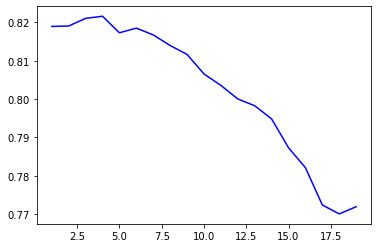

In [161]:
x = max_depth_range 
y = accuracy
plt.plot(x, y, "b-")
plt.show()

 - Seleccionamos el max_depth = 4 como ajuste optimo.

In [190]:
#Modeling (Classification)
clf = DecisionTreeClassifier(max_depth = 4)
model = clf.fit(X2_train,y2_train)

#Predictions
preds = model.predict(X2_test)

In [191]:
print(classification_report(y2_test, preds))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7086
           1       0.66      0.35      0.46      1955

    accuracy                           0.82      9041
   macro avg       0.75      0.65      0.68      9041
weighted avg       0.80      0.82      0.80      9041



In [192]:
print(confusion_matrix(y2_test, preds))

[[6736  350]
 [1263  692]]


    - Luego de ejecutar nuevamente el modelo aplicando el ajuste en el hiperparametro max_depth, se logra obtener un 
    incremento casi del 70% en la precición del modelo en la detección de los default pasamos de tener 39% a 66%.

#### - Ajustes de Max_depth (Random Forest Classifier)

In [169]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 12))
accuracy = []
for depth in max_depth_range:
    clf = RandomForestClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(X2_train, y2_train)    
    score = clf.score(X2_test, y2_test)
    accuracy.append(score)

In [170]:
accuracy

[0.7880765402057295,
 0.80566309036611,
 0.8120783099214689,
 0.8150647052317221,
 0.8160601703351399,
 0.8211481030859418,
 0.8218117464882203,
 0.8220329609556465,
 0.8209268886185157,
 0.8203738524499502,
 0.820152637982524]

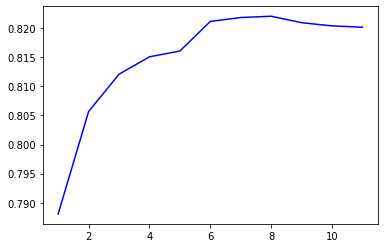

In [171]:
x = max_depth_range 
y = accuracy
plt.plot(x, y, "b-")
plt.show()

In [193]:
#Modeling (Classification)
clf = RandomForestClassifier(max_depth = 8)
model = clf.fit(X2_train,y2_train)

#Predictions
preds = model.predict(X2_test)

In [194]:
print(classification_report(y2_test, preds))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7086
           1       0.67      0.35      0.46      1955

    accuracy                           0.82      9041
   macro avg       0.75      0.65      0.68      9041
weighted avg       0.80      0.82      0.80      9041



In [195]:
print(confusion_matrix(y2_test, preds))

[[6743  343]
 [1268  687]]


### Modelling: Cross Validation Method

In [202]:
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier(max_depth = 8)))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier(max_depth = 4)))
algos_Class.append(('Gradient Boosting Classifier', GradientBoostingClassifier(max_depth = 3)))
algos_Class.append(('Naive Bayes Gaussian', GaussianNB()))
algos_Class.append(('Suport Vector Machine', SVC()))

In [203]:
#classification
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, X2,y2, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)

In [204]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.8189090550111119
Decision Tree Classifier 0.8201700406051436
Gradient Boosting Classifier 0.8204355985480709
Naive Bayes Gaussian 0.37811262104282223
Suport Vector Machine 0.7787548987210546


    - A nivel de presición general y contemplando el ajuste en el hiperparametro max_depth para RandomFores, DecisionTree y GradientBoosting, el Modelo que nos da el mejor resultado es Gradient Boosting Classifier.

#### - Ajustes de Max_depth (Gradient Boosting Classifier)

In [197]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 12))
accuracy = []
for depth in max_depth_range:
    clf = GradientBoostingClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(X2_train, y2_train)    
    score = clf.score(X2_test, y2_test)
    accuracy.append(score)

In [198]:
accuracy

[0.8199314235150978,
 0.823913283928769,
 0.824023891162482,
 0.8231390332927774,
 0.8211481030859418,
 0.8178298860745493,
 0.8169450282048446,
 0.816170777568853,
 0.813516203959739,
 0.8126313460900343,
 0.8169450282048446]

    - Max_depth seleccionado = 3

### - Resumen de Reportes de clasificación de los modelos

In [227]:
#Modeling (Classification)
clf = DecisionTreeClassifier()
model = clf.fit(X2_train,y2_train)

#Predictions
preds = model.predict(X2_test)

print(classification_report(y2_test, preds))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      7086
           1       0.39      0.42      0.40      1955

    accuracy                           0.73      9041
   macro avg       0.61      0.62      0.62      9041
weighted avg       0.74      0.73      0.74      9041



In [228]:
print(confusion_matrix(y2_test, preds))

[[5798 1288]
 [1134  821]]


In [222]:
#Modeling (Classification)
clf =  RandomForestClassifier(max_depth = 8)
model = clf.fit(X2_train,y2_train)

#Predictions
preds = model.predict(X2_test)

print(classification_report(y2_test, preds))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7086
           1       0.67      0.35      0.46      1955

    accuracy                           0.82      9041
   macro avg       0.75      0.65      0.67      9041
weighted avg       0.80      0.82      0.80      9041



In [224]:
print(confusion_matrix(y2_test, preds))

[[6750  336]
 [1278  677]]


In [225]:
#Modeling (Classification)
clf = DecisionTreeClassifier(max_depth = 4)
model = clf.fit(X2_train,y2_train)

#Predictions
preds = model.predict(X2_test)

print(classification_report(y2_test, preds))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7086
           1       0.66      0.35      0.46      1955

    accuracy                           0.82      9041
   macro avg       0.75      0.65      0.68      9041
weighted avg       0.80      0.82      0.80      9041



In [226]:
print(confusion_matrix(y2_test, preds))

[[6736  350]
 [1263  692]]


In [220]:
#Modeling (Classification)
clf = GradientBoostingClassifier(max_depth = 3)
model = clf.fit(X2_train,y2_train)

#Predictions
preds = model.predict(X2_test)

print(classification_report(y2_test, preds))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7086
           1       0.67      0.36      0.47      1955

    accuracy                           0.82      9041
   macro avg       0.76      0.66      0.68      9041
weighted avg       0.81      0.82      0.80      9041



In [221]:
print(confusion_matrix(y2_test, preds))

[[6741  345]
 [1247  708]]


### - Resumen de Hallazgos

    - A nivel de precisión general, el modelo que dió un mejor resultado fue "GradientBoostingClassifier" con un 82.39%, 
    solo unas milesimas por arriba de RandomForestClassifier(ajustado) y DecisionTreeClassifier(ajustado). Sin embargo 
    teniendo presente que lo que se desea predecir es si la persona va a caer en deafult, es importante que 
    consideremos como estan los resultados de las metricas de los modelos en relación a esta variable (default=1).

    -Resultados de las Metricas por modelo:

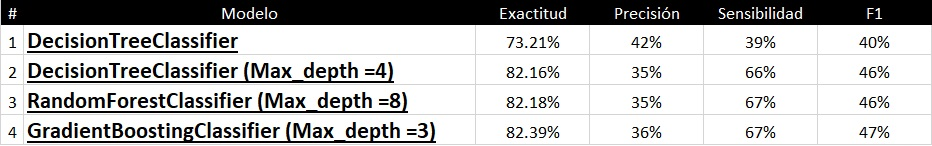

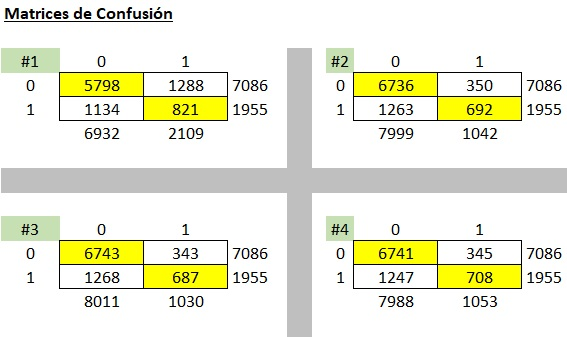

    - En los resultados de las metricas podemos observar que a nivel de sensibilidad DecisionTreeClassifer es el modelo que 
    nos da un resultado más alto a pesar de que en Exactitud es el mas bajo de los 4 modelos. Si vemos las matrices de 
    confusión se puede observar que ese modelo es el que predijo que 821 personas cayeron en Default y en realidad si 
    cayeron, en promedio un 15% más que los otros modelos, sin embargo si vemos la parte de los errores ese modelo predijo 
    como Default 1,288 personas que en realidad no cayeron (un 360% más en promedio que los otros modelos).
    
    - El problema inicial indica que las tasas de incumplimiento han aumentado, y si es posible aprobar a los clientes con 
    alta certeza o como podemos asegurar que los clientes puedan pagar sus prestamos. Como todas las entidades financieras 
    lo necesitan, hay que tener en cuenta el apetito de riesgo que desea mantener la empresa (cantidad de riesgo que desea
    asumir). Si utilizamos el modelo #1 como ejemplo, podemos ver que es el que más clientes que caen en Default predice, 
    sin embargo tambien este modelo supera en aproximadamente un 360% a los otros prediciendo personas como que van a caer 
    en Default que en realidad no cayeron, por lo que se debe evaluar si vale la pena utilizar el modelo que predice una 
    mayor cantidad de clientes default pero que a su ves se equivoca más prediciendo los que no cayeron en default.
    
    - De acuerdo con lo anterior el modelo que se recomendaria utilizar es el #4 (Gradient Boosting Classifier, ajustado), 
    éste modelo presenta un accuracy de 82%, una sensibilidad del 67%(% de Default Real predichos/total Default predicho). 
    Este modelo a nivel de Predicción de Default es el segundo mas alto y es tambien el segundo en predecir menos Default
    errados, y es el que nos da un F1 Score más alto de los 4 modelos.  